# SVM, KSVM Classification, Naive Bayes, Decision Trees and Random Forest

## Load all the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

/Users/omkarmutreja/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Load the dataset

In [2]:
df = pd.read_csv('/Users/omkarmutreja/Downloads/Kernel_SVM/Social_Network_Ads.csv')
print(df.head())
X = df.iloc[:,[2,3]].values
y = df.iloc[:,4]
print(X.shape)
print(y.shape)

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
(400, 2)
(400,)


## Split the data into training and test and perform feature scaling

In [3]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(300, 2)
(100, 2)


/Users/omkarmutreja/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Fitting SVM to the training data and predicting the test data results

In [4]:
svm = SVC(kernel='linear',random_state=0)
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[66,  2],
       [ 8, 24]])

## Visualize training set results

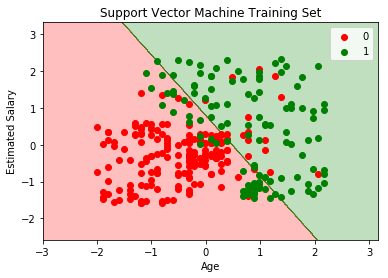

In [5]:
X_set,y_set = X_train,y_train
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop=X_set[:,0].max()+1,step=0.01),
                   np.arange(start = X_set[:,1].min() - 1, stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,svm.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.25,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)
plt.title('Support Vector Machine Training Set')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualize test set results

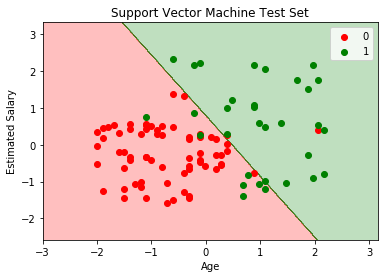

In [6]:
X_set,y_set = X_test,y_test
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop=X_set[:,0].max()+1,step=0.01),
                   np.arange(start = X_set[:,1].min() - 1, stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,svm.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.25,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)
plt.title('Support Vector Machine Test Set')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## KSVM

In [7]:
ksvm = SVC(kernel='rbf', random_state=0)
ksvm.fit(X_train,y_train)
y_pred = ksvm.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[64,  4],
       [ 3, 29]])

## Visualizing train set results

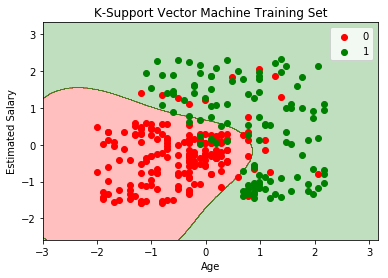

In [8]:
X_set,y_set = X_train,y_train
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop=X_set[:,0].max()+1,step=0.01),
                   np.arange(start = X_set[:,1].min() - 1, stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,ksvm.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.25,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)
plt.title('K-Support Vector Machine Training Set')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualizing test set results

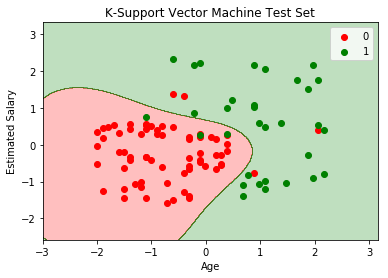

In [9]:
X_set,y_set = X_test,y_test
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop=X_set[:,0].max()+1,step=0.01),
                   np.arange(start = X_set[:,1].min() - 1, stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,ksvm.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.25,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)
plt.title('K-Support Vector Machine Test Set')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [10]:
# Naive Bayes

In [11]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train,y_train)
y_pred = naive_bayes.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[65,  3],
       [ 7, 25]])

In [12]:
## Visualizing train set results

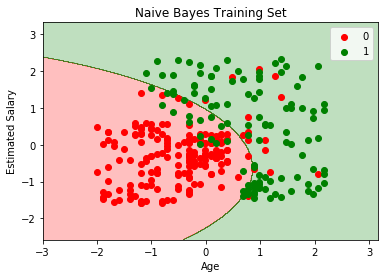

In [13]:
X_set,y_set = X_train,y_train
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop=X_set[:,0].max()+1,step=0.01),
                   np.arange(start = X_set[:,1].min() - 1, stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,naive_bayes.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.25,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)
plt.title('Naive Bayes Training Set')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualizing test set results

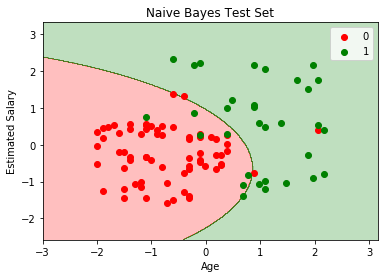

In [14]:
X_set,y_set = X_test,y_test
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop=X_set[:,0].max()+1,step=0.01),
                   np.arange(start = X_set[:,1].min() - 1, stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,naive_bayes.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.25,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)
plt.title('Naive Bayes Test Set')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [15]:
# Decision Tree 

In [16]:
tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[62,  6],
       [ 3, 29]])

## Visualizing train set results

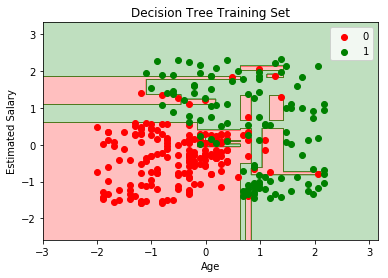

In [17]:
X_set,y_set = X_train,y_train
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop=X_set[:,0].max()+1,step=0.01),
                   np.arange(start = X_set[:,1].min() - 1, stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,tree.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.25,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)
plt.title('Decision Tree Training Set')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualizing test set results

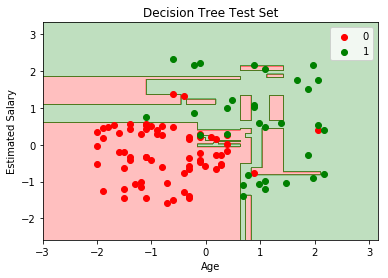

In [18]:
X_set,y_set = X_test,y_test
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop=X_set[:,0].max()+1,step=0.01),
                   np.arange(start = X_set[:,1].min() - 1, stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,tree.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.25,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)
plt.title('Decision Tree Test Set')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## The above two graphs clearly try to overfit the data and hence we implement Random Forest model to avoid overfitting

# Random Forest

In [19]:
random_forest = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
random_forest.fit(X_train,y_train)
y_pred = random_forest.predict(X_test) 
confusion_matrix(y_test,y_pred)

array([[63,  5],
       [ 3, 29]])

## Visualizing train set results

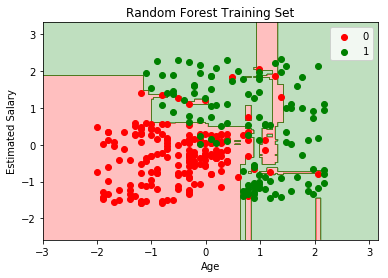

In [20]:
X_set,y_set = X_train,y_train
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop=X_set[:,0].max()+1,step=0.01),
                   np.arange(start = X_set[:,1].min() - 1, stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,random_forest.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.25,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)
plt.title('Random Forest Training Set')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualizing test set results

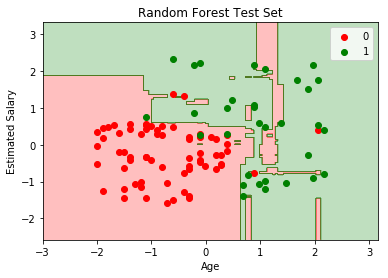

In [21]:
X_set,y_set = X_test,y_test
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop=X_set[:,0].max()+1,step=0.01),
                   np.arange(start = X_set[:,1].min() - 1, stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,random_forest.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.25,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)
plt.title('Random Forest Test Set')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## There seems to be some overfitting in the test results.
## Hence, we can conclude that for this dataset KSVM performed the best as we had a smooth curved decision boundary.

# K-fold Cross-Validation on KSVM model

In [22]:
c = cross_val_score(estimator=ksvm,X=X_train,y=y_train,cv=10)
print(c.mean())
print(c.std())

0.9005302187615868
0.06388957356626285


## To find optimal values of hyper-parameters

In [23]:
# Grid Search to find the best model and best parameters
parameters = [{'C':[1,10,100,1000],'kernel':['linear'],
               'C':[1,10,100,1000],'kernel':['rbf'],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]}]
grid_search = GridSearchCV(estimator=ksvm,param_grid=parameters,scoring='accuracy',cv=10,n_jobs=-1)
grid_search = grid_search.fit(X_train,y_train)
print(grid_search.best_score_)
print(grid_search.best_params_)

0.9033333333333333
{'C': 1, 'gamma': 0.7, 'kernel': 'rbf'}
